## Assignment - 4
### by: Sanjai M 19Z241

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import cluster
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [91]:
df=pd.read_csv('Mall_Customers.csv')

In [92]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


c:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

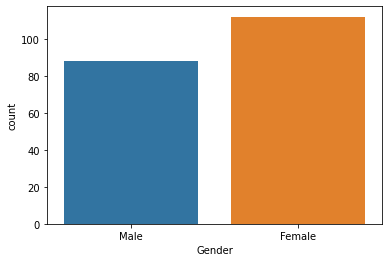

In [93]:
sns.countplot(df['Gender'])

c:\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

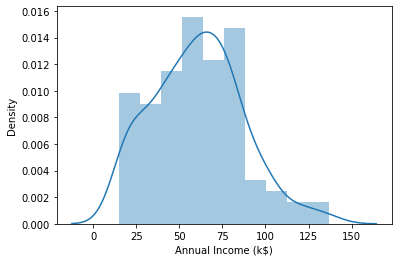

In [94]:
sns.distplot(df['Annual Income (k$)'])

c:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

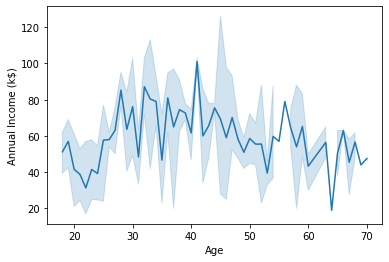

In [95]:
sns.lineplot(df["Age"],df['Annual Income (k$)'])

c:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

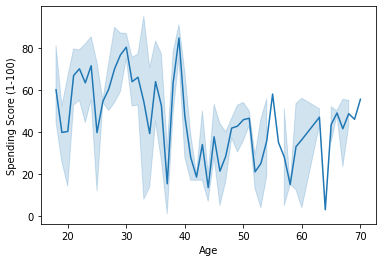

In [96]:
sns.lineplot(df["Age"],df['Spending Score (1-100)'])

c:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='Age'>

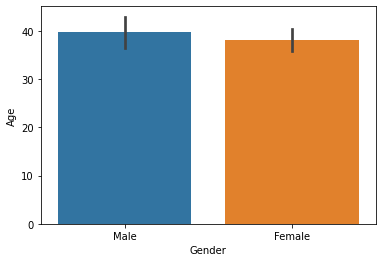

In [97]:
sns.barplot(df['Gender'],df['Age'])

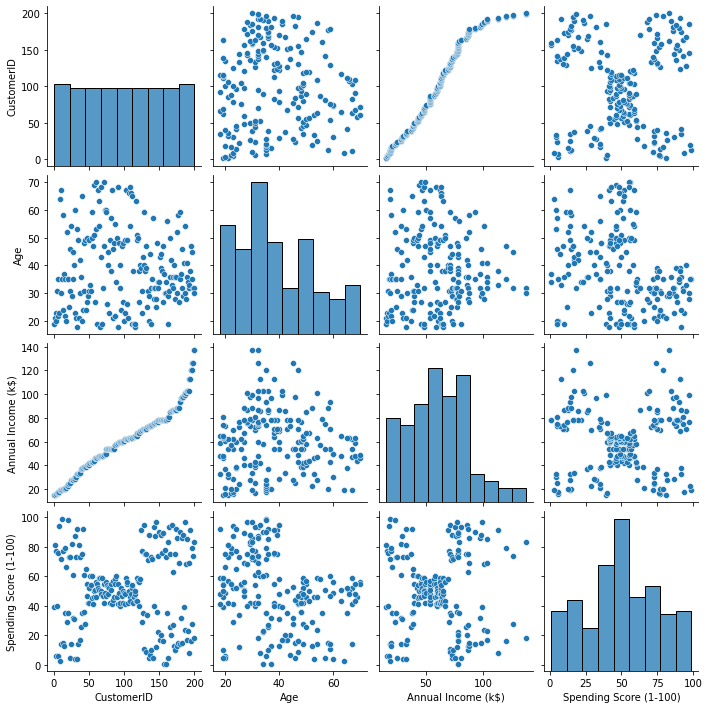

In [98]:
sns.pairplot(df)

In [99]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [101]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

c:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)'>

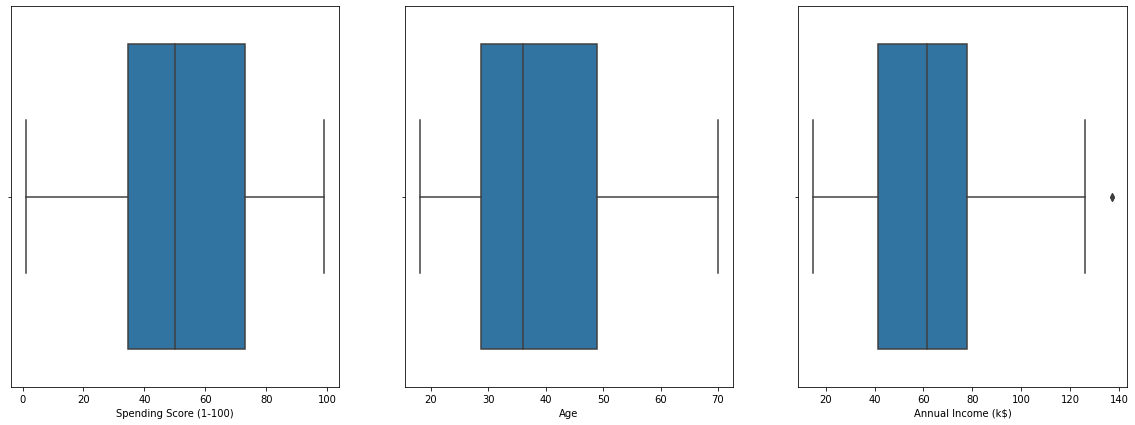

In [102]:

fig, axs= plt.subplots(1, 3, sharey=True,figsize=(20, 7))
sns.boxplot(df['Spending Score (1-100)'], ax=axs[0])
sns.boxplot(df['Age'], ax=axs[1])
sns.boxplot(df['Annual Income (k$)'],ax=axs[2])



In [103]:
df["Annual Income (k$)"]= np.where(df["Annual Income (k$)"]>130,61.5,df["Annual Income (k$)"])

c:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)'>

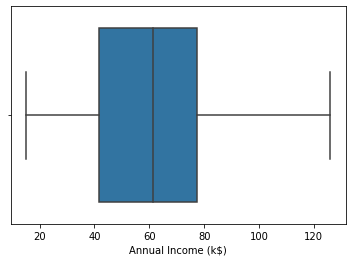

In [104]:
sns.boxplot(df['Annual Income (k$)'])

In [105]:
encoder=preprocessing.OneHotEncoder()
enc_data=pd.DataFrame(encoder.fit_transform(df[['Gender']]).toarray())
enc_data.drop(0,axis=1,inplace=True)


In [106]:
df.drop(['Gender'],axis=1,inplace=True)

In [107]:
df=pd.concat([enc_data,df],axis=1)

In [108]:
df.head()

,1,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,1,19,15.0,39
1,1.0,2,21,15.0,81
2,0.0,3,20,16.0,6
3,0.0,4,23,16.0,77
4,0.0,5,31,17.0,40


In [109]:
df.rename(columns={1:'Gender'},inplace=True)

In [110]:
df.head()

,Gender,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,1,19,15.0,39
1,1.0,2,21,15.0,81
2,0.0,3,20,16.0,6
3,0.0,4,23,16.0,77
4,0.0,5,31,17.0,40


In [111]:
scaler=StandardScaler()
df_=pd.DataFrame(scaler.fit_transform(df))

In [112]:
df_.head()

,0,1,2,3,4
0,1.128152,-1.723412,-1.424569,-1.788777,-0.434801
1,1.128152,-1.706091,-1.281035,-1.788777,1.195704
2,-0.886405,-1.688771,-1.352802,-1.748853,-1.715913
3,-0.886405,-1.671450,-1.137502,-1.748853,1.040418
4,-0.886405,-1.654129,-0.563369,-1.708930,-0.395980


In [113]:
loss=[]
for i in range(1,11):
    km=cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
    km.fit(df_)
    loss.append(km.inertia_)

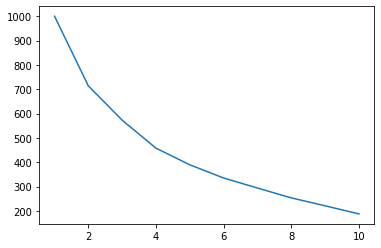

In [114]:
plt.plot(range(1,11),loss)

In [115]:
model=cluster.KMeans(n_clusters=5,init='k-means++',random_state=0)

In [116]:
model.fit(df_)

KMeans(n_clusters=5, random_state=0)

In [117]:
prediction=model.predict(df_)

In [118]:
df_['res']=pd.Series(prediction)

In [119]:
df_.head()

,0,1,2,3,4,res
0,1.128152,-1.723412,-1.424569,-1.788777,-0.434801,1
1,1.128152,-1.706091,-1.281035,-1.788777,1.195704,1
2,-0.886405,-1.688771,-1.352802,-1.748853,-1.715913,1
3,-0.886405,-1.671450,-1.137502,-1.748853,1.040418,1
4,-0.886405,-1.654129,-0.563369,-1.708930,-0.395980,1


In [120]:
X=df_.iloc[:,0:5]

In [121]:
y=df_.iloc[:,-1]

In [122]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=100)

In [123]:
lr=LogisticRegression()

In [124]:
lr.fit(X_train,y_train)

LogisticRegression()

In [125]:
prediction=lr.predict(X_test)

In [126]:
print(confusion_matrix(y_test,prediction))

[[14  0  0  0  0]
 [ 0 15  0  0  0]
 [ 0  0 14  0  0]
 [ 0  0  0  8  0]
 [ 1  0  0  0  8]]


In [127]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8
           4       1.00      0.89      0.94         9

    accuracy                           0.98        60
   macro avg       0.99      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

